In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.colors import LogNorm
import os
from astropy.io import ascii
cwd = os.getcwd()
os.chdir(cwd + '/..')
from gcex.utils.input_output import cosmic_read_helper, read_in_for_paper
from gcex.utils.input_output import gr_pdot
from gcex.utils.getlcs import get_lcs_test
os.chdir(cwd)
import pickle
import pandas 
import pandas as pd
import pdb

# Timing

In [3]:
num_freqs, total, per = np.load('data/gce_{}_{}.npy'.format(nps, pb)).T
num_freqs, per

NameError: name 'nps' is not defined

cuvar 100 15 [  65536.  131072.  262144.  524288. 1048576. 2097152. 4194304.] [1.73541191e-06 7.27967302e-07 4.27449680e-07 2.75422420e-07
 2.01736325e-07 1.60916553e-07 1.41343466e-07]
gce 100 15 [   65536.   131072.   262144.   524288.  1048576.  2097152.  4194304.
  8388608. 16777216.] [5.99662604e-08 5.32199786e-08 5.03713882e-08 4.91511957e-08
 4.88159729e-08 4.90735257e-08 4.89419937e-08 4.88701059e-08
 4.88041789e-08]
cuvar 1000 15 [  65536.  131072.  262144.  524288. 1048576. 2097152. 4194304.] [2.17297564e-06 1.53244746e-06 1.22950481e-06 9.90208692e-07
 9.15170519e-07 9.01395754e-07 9.26786566e-07]
gce 1000 15 [   65536.   131072.   262144.   524288.  1048576.  2097152.  4194304.
  8388608. 16777216.] [5.08805619e-07 4.66475453e-07 4.45411004e-07 4.35810794e-07
 4.31804694e-07 4.28970102e-07 4.29389964e-07 4.26632227e-07
 4.23305784e-07]
cuvar 100 50 [  65536.  131072.  262144.  524288. 1048576. 2097152. 4194304.] [1.61702406e-06 9.58753116e-07 6.60110104e-07 5.12640298e-07
 

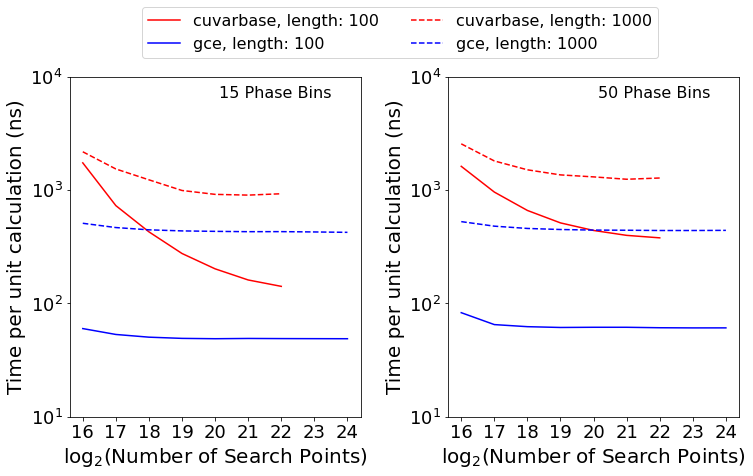

In [5]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_size_inches(12, 7)
plt.subplots_adjust(hspace=0.0, wspace=0.3, right=0.9, top=0.8)
num_pdots = 256

tick_fontsize = 18
label_fontsize = 20

# get data
phase_bin_list = [15, 50]
num_points = [100, 1000]
colors = ['blue', 'red']
lss = ['solid', 'dashed']


for pb, ax1 in zip(phase_bin_list, ax):
    for nps, ls in zip(num_points, lss): 
        num_freqs, total, per = np.load('data/cuvar_{}_{}.npy'.format(nps, pb)).T
        #ax1.plot(np.log2(num_freqs*num_pdots), np.log10(total))
        label = 'cuvarbase, length: {}'.format(nps)
        print('cuvar', nps, pb, num_freqs, per)
        ax1.plot(np.log2(num_freqs), np.log10(per), label=label, color='red', ls=ls)
        
        num_freqs, total, per = np.load('data/gce_{}_{}.npy'.format(nps, pb))[7:].T
        label = 'gce, length: {}'.format(nps)
        print('gce', nps, pb, num_freqs, per)
        ax1.plot(np.log2(num_freqs), np.log10(per), label=label, color='blue', ls=ls)
        
        #if nps == 100 and pb == 50:
        #    num_freqs, total, per = np.load('data/pdot_check_timing_results_{}_{}.npy'.format(pb, nps))
        #    #ax1.plot(np.log2(num_freqs*num_pdots), np.log10(total))
        #    label = '{} Phase Bins, {} Light Curve Points'.format(pb, nps)
        #    ax1.plot(np.log2(num_freqs*num_pdots), np.log10(per), label=label, color='k', ls=ls)
   
for ax1 in ax:
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(tick_fontsize) 
   
num_freqs = 2**16


#for i in [15, 50]:
#    num_pdots, total, per = np.load('data/timing_results_2_{}_{}.npy'.format(, 1000))
#    ax1.plot(np.log2(num_freqs*num_pdots), np.log10(per))#, label=label, color=color, ls=ls)

time_ticks = [-8, -7, -6, -5]
time_tick_labels = [r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$']
for ax1 in ax:
    ax1.set_yticks(time_ticks)
    ax1.set_yticklabels(time_tick_labels, fontsize=tick_fontsize)
    ax1.set_ylabel('Time per unit calculation (ns)', fontsize=label_fontsize)
    ax1.set_xlabel(r"log$_2$(Number of Search Points)", fontsize=label_fontsize)
ax[1].legend(loc='center right', prop={'size':16}, ncol=2, bbox_to_anchor=[0.75, 1.13])
ax[0].text(0.9, 0.95, '15 Phase Bins', horizontalalignment='right',
           verticalalignment='center', transform=ax[0].transAxes, fontsize=16)
ax[1].text(0.9, 0.95, '50 Phase Bins', horizontalalignment='right',
           verticalalignment='center', transform=ax[1].transAxes, fontsize=16)
fig.savefig("figures/timing_example.pdf", dpi=200)

In [7]:
check.shape

(7, 3)

# Light Curve Example

-0.7956748881884863
0.0 0.9991575655299201
[[-1.00000000e-06  3.92156863e-02]
 [ 1.96078431e-02  5.88235294e-02]
 [ 3.92156863e-02  7.84313725e-02]
 [ 5.88235294e-02  9.80392157e-02]
 [ 7.84313725e-02  1.17647059e-01]
 [ 9.80392157e-02  1.37254902e-01]
 [ 1.17647059e-01  1.56862745e-01]
 [ 1.37254902e-01  1.76470588e-01]
 [ 1.56862745e-01  1.96078431e-01]
 [ 1.76470588e-01  2.15686275e-01]
 [ 1.96078431e-01  2.35294118e-01]
 [ 2.15686275e-01  2.54901961e-01]
 [ 2.35294118e-01  2.74509804e-01]
 [ 2.54901961e-01  2.94117647e-01]
 [ 2.74509804e-01  3.13725490e-01]
 [ 2.94117647e-01  3.33333333e-01]
 [ 3.13725490e-01  3.52941176e-01]
 [ 3.33333333e-01  3.72549020e-01]
 [ 3.52941176e-01  3.92156863e-01]
 [ 3.72549020e-01  4.11764706e-01]
 [ 3.92156863e-01  4.31372549e-01]
 [ 4.11764706e-01  4.50980392e-01]
 [ 4.31372549e-01  4.70588235e-01]
 [ 4.50980392e-01  4.90196078e-01]
 [ 4.70588235e-01  5.09803922e-01]
 [ 4.90196078e-01  5.29411765e-01]
 [ 5.09803922e-01  5.49019608e-01]
 [ 5.2941176

BdbQuit: 

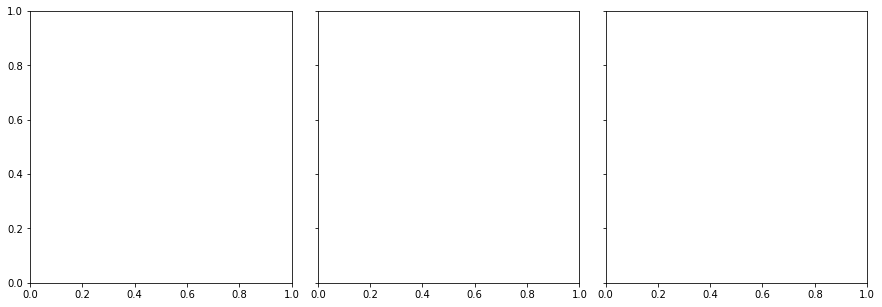

In [3]:

input_dict = {
                 'mag': 19.0,
                 'm1': 0.07231938,
                 'm2': 0.7526806,
                 'd': 1100854.05444269,
                 'period': 7.0 / 24.0 / 60.0,
                 'Pdot': -1e-11,
                 'incl': 100.,
                 'sbratio': 0.5
             }


input_dict['q'] = 10.40773013
input_dict['m_tot'] = 0.82499998

input_dict = {key: np.array([input_dict[key]]) for key in input_dict}
"""
lcs = get_lcs_test(input_dict, mag=19.0, min_pts=1200, max_pts=1201, verbose=25, mean_dt=3, sig_t=2)

# add ad hoc errors
mag = -lcs[0][:, 1]
std = 0.005
#lcs[0][:, 1] = np.random.randn(len(mag))*lcs[0][:, 2] + mag
"""

t_obs, mag, err = np.load('../test_curve.npy')

lcs = [np.array([t_obs, mag, err]).T]

titles = ['Lightcurve', 'Correct Parameters', 'Wrong Parameters']

fig, ax = plt.subplots(1, 3, sharey=True)
plt.subplots_adjust(wspace=0.1)
fig.set_size_inches(15.0, 5.0)
ax = ax.ravel()


period = input_dict['period']
frequency = 1./period
pdot = input_dict['Pdot']


wrong_period = 4.8610800542107646e-3 # np.abs((1+np.random.randn()))*period
wrong_pdot = 0.0 #pdot*4 # (1+np.random.randn())*pdot
wrong_frequency = 1/wrong_period

t = lcs[0][:,0]# + np.random.rand()
mags = -lcs[0][:,1]

print(mags.min() - np.median(mags))

fold = np.fmod(t-0.5*pdot*frequency*(t*t), period)*frequency
wrong_fold = np.fmod(t-0.5*wrong_pdot*wrong_frequency*(t*t), wrong_period)*wrong_frequency
print(wrong_fold.min(), wrong_fold.max())

phase_bins = 50

phase_bin_edges = np.zeros(phase_bins*2)
bin_start = 0.0;
bin_end = 2./(phase_bins + 1);
dbin = 1./(phase_bins + 1);
for i in range(phase_bins):
    phase_bin_edges[2*i] = bin_start + dbin*i
    phase_bin_edges[2*i+1] = bin_end + dbin*i
    
phase_bin_edges[2*phase_bins-1] = 1.000001;
phase_bin_edges[0] = -0.000001;

phase_bin_edges = phase_bin_edges.reshape(-1, 2)

print(phase_bin_edges)
mag_bin_template = np.array([0.        , 0.18181818, 0.09090909, 0.27272727, 0.18181818,
           0.36363636, 0.27272727, 0.45454545, 0.36363636, 0.54545455,
           0.45454545, 0.63636364, 0.54545455, 0.72727273, 0.63636364,
           0.81818182, 0.72727273, 0.90909091, 0.81818182, 1.        ]).reshape(-1, 2)

min_val = mags.min()
max_val = mags.max()

if min_val < 0.0:
    min_val = min_val * 1.001
else:
    min_val = min_val * 0.999

if max_val < 0.0:
    max_val = max_val * 0.999
else:
    max_val = max_val * 1.001

cond_entr_contrib = 0.0
mag_bin_template = min_val + (max_val - min_val) * mag_bin_template
print(mag_bin_template)
for phase_bin_i, (phase_bin_begin, phase_bin_end) in enumerate(phase_bin_edges):
    inds = np.where((wrong_fold < phase_bin_end) & (wrong_fold > phase_bin_begin))
    print(inds)
    mags_here = mags[inds]

    bins_amount = np.zeros(mag_bin_template.shape[0])
    for mag in mags_here:
        for bin_i, (bin_start, bin_end) in enumerate(mag_bin_template):
            if mag < bin_end and mag > bin_start:
                pdb.set_trace()
                bins_amount[bin_i] += 1

    print(bins_amount)

    prob_m_i_phi_i = bins_amount/len(mags)

    prob_phi_i = np.sum(prob_m_i_phi_i)

    for temp in prob_m_i_phi_i:
        if temp > 0.0:
            cond_entr_contrib += temp * np.log(prob_phi_i/temp)

    print(prob_phi_i*len(mags))
    
print('CE:', cond_entr_contrib)
#print(mags)
ax[0].scatter(t, mags, s=10)
ax[1].scatter(fold, mags, s=10)
ax[2].scatter(wrong_fold, mags, s=10)

limits = (0.7, 1.05)
#ax[0].set_ylim(*limits)

for (ax_i, title) in zip(ax, titles):
    ax_i.set_title(title, fontsize=20)
    ax_i.tick_params('both', labelsize=14)
    
#ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8])
for ax_i in ax[1:]:
    ax_i.set_xlim(0.0, 1.0)
    ax_i.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.grid(True, which='both')
    ax_i.set_xlabel('Normalized Folded Phase', fontsize=16)

#ax[0].set_ylim(0.85, 1.05)
ax[0].set_xlabel('Time (days)', fontsize=16)
ax[0].set_ylabel('Normalized Magnitude', fontsize=16)
#fig.savefig('figures/light_curve_example.pdf', dpi=200)
print("correct period:", period*24*60, "correct pdot:", pdot)
print("wrong period:", wrong_period*24*60, "wrong pdot:", wrong_pdot)

84.15
()
-1.0695966835879443e-11
-0.6126125306879331
0.00261066488161191 0.9994262972745238
correct period: 7.0 correct pdot: -1.0695966835879443e-11
wrong period: 7.000000900205878 wrong pdot: -1.0981475262343973e-11


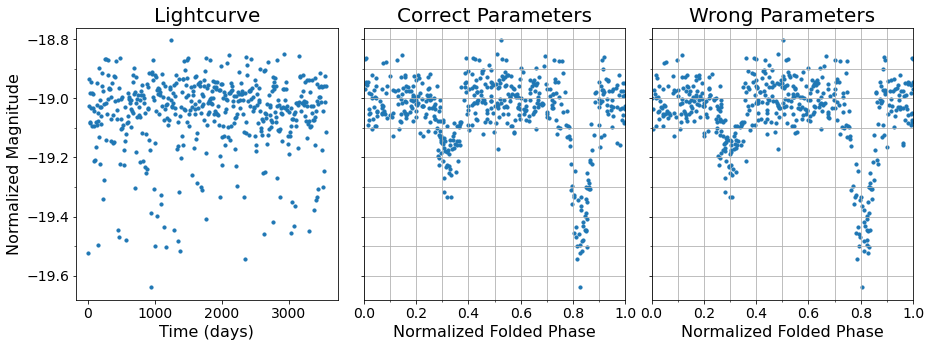

In [80]:
import pickle
with open('../input/grid_light_curves_fast.pickle', 'rb') as f:
    check = pickle.load(f)

keys = list(check.keys())
ind = 3
binary = check[keys[ind]]

input_dict = binary.get('params')

print(input_dict.get('incl'))
print(pdot.shape)

lcs = [np.array([binary.get('t'), binary.get('true_mag')]).T]
print(pdot.max())

titles = ['Lightcurve', 'Correct Parameters', 'Wrong Parameters']

fig, ax = plt.subplots(1, 3, sharey=True)
plt.subplots_adjust(wspace=0.1)
fig.set_size_inches(15.0, 5.0)
ax = ax.ravel()


period = input_dict['period']
frequency = 1./period
pdot = input_dict['Pdot']


wrong_period =  0.0048611117362540816  # np.abs((1+np.random.randn()))*period
wrong_pdot = -1.0981475262343973e-11 #pdot*4 # (1+np.random.randn())*pdot
wrong_frequency = 1/wrong_period

t = lcs[0][:,0] + np.random.rand()
mags = -lcs[0][:,1]

print(mags.min() - np.median(mags))

fold = np.fmod(t-0.5*pdot*frequency*(t*t), period)*frequency
wrong_fold = np.fmod(t-0.5*wrong_pdot*wrong_frequency*(t*t), wrong_period)*wrong_frequency
print(wrong_fold.min(), wrong_fold.max())


#print(mags)
ax[0].scatter(t, mags, s=10)
ax[1].scatter(fold, mags, s=10)
ax[2].scatter(wrong_fold, mags, s=10)

limits = (0.7, 1.05)
#ax[0].set_ylim(*limits)

for (ax_i, title) in zip(ax, titles):
    ax_i.set_title(title, fontsize=20)
    ax_i.tick_params('both', labelsize=14)
    
#ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8])
for ax_i in ax[1:]:
    ax_i.set_xlim(0.0, 1.0)
    ax_i.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.grid(True, which='both')
    ax_i.set_xlabel('Normalized Folded Phase', fontsize=16)

#ax[0].set_ylim(0.85, 1.05)
ax[0].set_xlabel('Time (days)', fontsize=16)
ax[0].set_ylabel('Normalized Magnitude', fontsize=16)
#fig.savefig('figures/light_curve_example.pdf', dpi=200)
print("correct period:", period*24*60, "correct pdot:", pdot)
print("wrong period:", wrong_period*24*60, "wrong pdot:", wrong_pdot)

In [15]:
input_dict

{'bin_num': 150691,
 'tphys': 9174.639221249961,
 'kstar_1': 10.0,
 'kstar_2': 10.0,
 'ecc': 0.0,
 'RROL_1': 0.20764010495376017,
 'RROL_2': 0.19184653921566308,
 'evol_type': 4.0,
 'Vsys_1': 0.0,
 'Vsys_2': 0.0,
 'SNkick': 0.0,
 'SNtheta': 0.0,
 'aj_1': 2903.1695509872643,
 'aj_2': 0.0,
 'tms_1': 10000000000.0,
 'tms_2': 10000000000.0,
 'massc_1': 0.28162619667570726,
 'massc_2': 0.3080643337131059,
 't_birth': 824.9747442805311,
 't_evol_GW': 0.3860344695076492,
 'sep_final': 0.23967828739650163,
 'ecc_final': 0.0,
 'porb_final': 0.017699726090880944,
 'RL_1_final': 0.08896355076673923,
 'RL_2_final': 0.09268656895247274,
 'f_gw_peak': 0.0013078252188362571,
 'incl': 81.30966445811107,
 'xGx': -1.0695987499588917,
 'yGx': 0.7067695001754076,
 'zGx': -0.007768421997585599,
 'dist': 9.09946769480575,
 'lumin_1_final': 14.74486793827209,
 'lumin_2_final': 16.129067433034535,
 'teff_1_final': 2.694412481868259e-25,
 'teff_2_final': 2.947355025110917e-25,
 'M_DWD': 1.0460200232245045,
 'm

In [168]:
import pickle
with open('../input/light_curves_more.pickle', 'rb') as f:
    check = pickle.load(f)

pdot = []
period = []
keys = []
checkits = []
for i, (key, binary) in enumerate(check.items()):
    #print(1./binary.get('params').get('period'), binary.get('t').max(), i)
    pdot.append(binary.get('params').get('Pdot'))
    period.append(binary.get('params').get('period'))
    keys.append(key)
    
    mag = binary.get('true_mag')
    checkits.append(mag.max() - np.median(mag))
    

ind = 65


#np.argmin(pdot), np.min(pdot), np.sort(period)*24*60, np.argsort(period)
keep = np.where((np.asarray(pdot)<-1e-12) & (np.asarray(checkits)>0.2))[0]
#keep, np.argsort(np.asarray(pdot)[keep])

pdot = np.asarray(pdot)[keep]
period = np.asarray(period)[keep]
keys = np.asarray(keys)[keep]

sort = np.argsort(pdot)

pdot = np.asarray(pdot)[sort]
period = np.asarray(period)[sort]
keys = np.asarray(keys)[sort]
print(pdot)

ind = 60
binary = check[keys[ind]]

input_dict = binary.get('params')

print(input_dict.get('incl'))
print(pdot.shape)

lcs = [np.array([binary.get('t'), binary.get('true_mag')]).T]
print(pdot.max())

[-3.34241059e-12 -2.15778626e-12 -2.02438218e-12 -1.92272564e-12
 -1.61718637e-12 -1.57721215e-12 -1.54340581e-12 -1.52580657e-12
 -1.44359918e-12 -1.35647263e-12 -1.33658253e-12 -1.33008844e-12
 -1.30618860e-12 -1.28857596e-12 -1.28448200e-12 -1.27577621e-12
 -1.27449589e-12 -1.26355511e-12 -1.25983369e-12 -1.25952516e-12
 -1.25944894e-12 -1.25857629e-12 -1.25837499e-12 -1.25403499e-12
 -1.24921609e-12 -1.24742563e-12 -1.24730002e-12 -1.24083743e-12
 -1.24069255e-12 -1.22879939e-12 -1.21976892e-12 -1.21416775e-12
 -1.21318516e-12 -1.21137525e-12 -1.21055025e-12 -1.20662282e-12
 -1.20420495e-12 -1.20387761e-12 -1.19389610e-12 -1.19348463e-12
 -1.19344907e-12 -1.19215858e-12 -1.18833192e-12 -1.18612496e-12
 -1.18122728e-12 -1.18068690e-12 -1.17902286e-12 -1.17724137e-12
 -1.17556163e-12 -1.17299523e-12 -1.17299069e-12 -1.17278965e-12
 -1.17056291e-12 -1.16139945e-12 -1.15781363e-12 -1.15278018e-12
 -1.14903335e-12 -1.14367382e-12 -1.14346946e-12 -1.14139483e-12
 -1.13997148e-12 -1.13787

(array([173.,  57.,  59.,  47.,  47.,  57.,  40.,  35.,  32.,  18.,  32.,
         30.,  26.,  24.,  16.,  25.,  15.,  20.,  22.,  21.]),
 array([0.03671319, 0.09223371, 0.14775422, 0.20327474, 0.25879526,
        0.31431577, 0.36983629, 0.42535681, 0.48087733, 0.53639784,
        0.59191836, 0.64743888, 0.70295939, 0.75847991, 0.81400043,
        0.86952095, 0.92504146, 0.98056198, 1.0360825 , 1.09160302,
        1.14712353]),
 <a list of 20 Patch objects>)

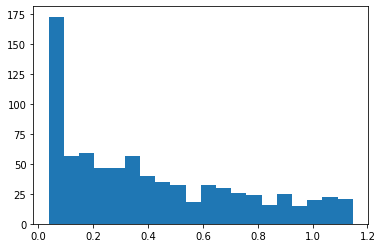

In [169]:
plt.hist(checkits, bins=20)

-0.6119430524189386
0.0009584826917057431 0.999926750053195
correct period: 24.14088727202927 correct pdot: -1.1399714815238871e-12
wrong period: 24.14088727202927 wrong pdot: -2.2799429630477744e-13


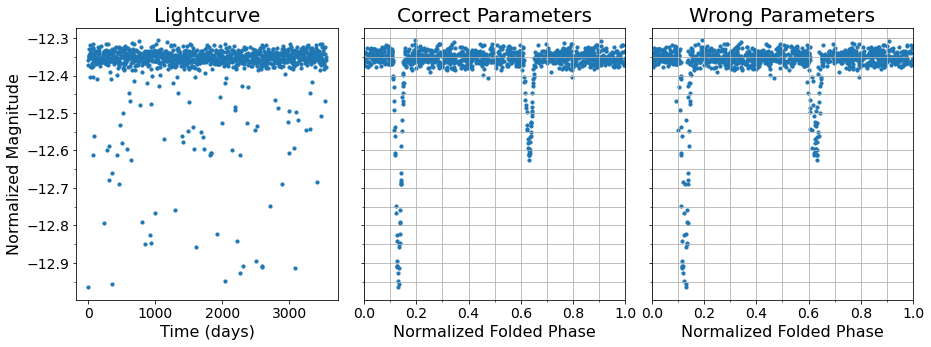

In [172]:
titles = ['Lightcurve', 'Correct Parameters', 'Wrong Parameters']

fig, ax = plt.subplots(1, 3, sharey=True)
plt.subplots_adjust(wspace=0.1)
fig.set_size_inches(15.0, 5.0)
ax = ax.ravel()


period = input_dict['period']
frequency = 1./period
pdot = input_dict['Pdot']


wrong_period = period # np.abs((1+np.random.randn()))*period
wrong_pdot = pdot/5 #pdot*4 # (1+np.random.randn())*pdot
wrong_frequency = 1/wrong_period

t = lcs[0][:,0] + np.random.rand()
mags = -lcs[0][:,1]

print(mags.min() - np.median(mags))

fold = np.fmod(t-0.5*pdot*frequency*(t*t), period)*frequency
wrong_fold = np.fmod(t-0.5*wrong_pdot*wrong_frequency*(t*t), wrong_period)*wrong_frequency
print(wrong_fold.min(), wrong_fold.max())

#print(mags)
ax[0].scatter(t, mags, s=10)
ax[1].scatter(fold, mags, s=10)
ax[2].scatter(wrong_fold, mags, s=10)

limits = (0.7, 1.05)
#ax[0].set_ylim(*limits)

for (ax_i, title) in zip(ax, titles):
    ax_i.set_title(title, fontsize=20)
    ax_i.tick_params('both', labelsize=14)
    
#ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8])
for ax_i in ax[1:]:
    ax_i.set_xlim(0.0, 1.0)
    ax_i.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.grid(True, which='both')
    ax_i.set_xlabel('Normalized Folded Phase', fontsize=16)

#ax[0].set_ylim(0.85, 1.05)
ax[0].set_xlabel('Time (days)', fontsize=16)
ax[0].set_ylabel('Normalized Magnitude', fontsize=16)
#fig.savefig('figures/light_curve_example.pdf', dpi=200)
print("correct period:", period*24*60, "correct pdot:", pdot)
print("wrong period:", wrong_period*24*60, "wrong pdot:", wrong_pdot)

# Populations

In [90]:
fp = '../input/gx_save_lambda_var_alpha_025.csv'
params = cosmic_read_helper(fp, x_sun=0.0, y_sun=0.0, z_sun=0.0, use_gr=False)
print(params.keys())

dict_keys(['f_gw[Hz]', 'f_dot_total [yr^(-2)]', 'm1 [msun]', 'm2[msun]', 'xGx[kpc]', 'yGx[kpc]', 'zGx[kpc]', 'm1', 'm2', 'q', 'm_tot', 'd', 'period', 'Pdot', 'incl', 'sbratio'])


In [8]:
params = pandas.read_hdf(fp)

In [33]:
params.keys()
params['porb'].shape

(6587134,)

25421 25421 6587134
3816
3816
3816
3816
3816
37539
37539
37539
37539
37539
35841
35841
35841
35841
35841


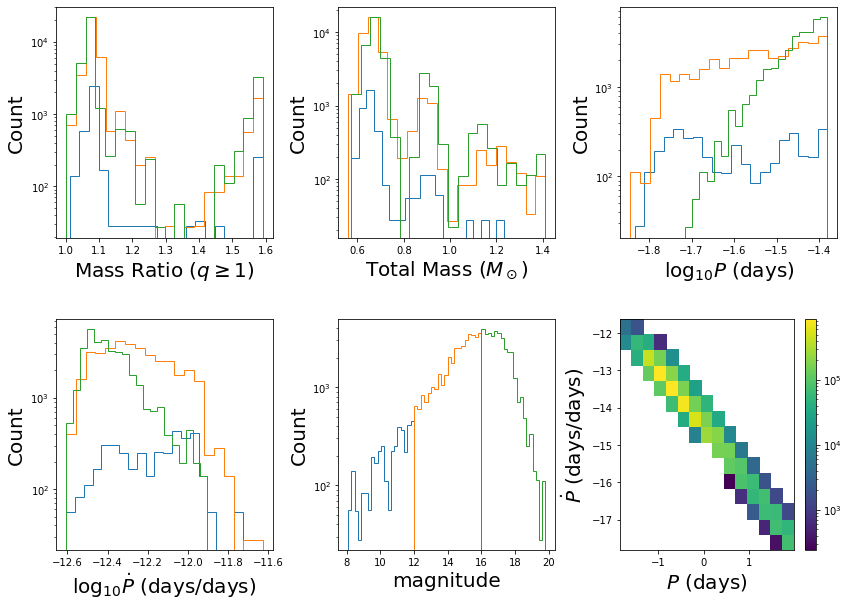

In [39]:
plt.close()

fp = '../new_data_out_file.hdf5'

m1 = params.get('mass_1')
m2 = params.get('mass_2')

print(len(np.unique(m1)), len(np.unique(m2)), len(params.get('porb')))
params['q'] = m1/m2*(m1 >= m2) + m2/m1*(m1 < m2)
params['m_tot'] = m1 + m2
params['period'] =  params.get('porb')
params['Pdot'] = gr_pdot(m1, m2, params.get('porb'))
params['m'] = params.get('m_DWD')
# TODO separate into populations ??
show_keys = ['q', 'm_tot', 'period', 'Pdot', 'm']
labels = [r'Mass Ratio ($q\geq1$)', r'Total Mass ($M_\odot$)', r'log$_{10}P$ (days)', r'log$_{10}\dot{P}$ (days/days)', 'magnitude'] # check parsec
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(hspace=0.35, wspace=0.3, right=0.9)
ax = ax.ravel()
fig.set_size_inches(14,10)

label_fontsize = 20

breaks = [8, 12, 16, 21]
for i in range(len(breaks) - 1):
    up = breaks[i+1]
    down = breaks[i]
    
    #inds = (np.log10(params['period']) > down) & (np.log10(params['period']) < up)
    
    inds = (params['period']<1/24.0) & (params['m'] > down) & (params['m'] < up)
    
    for axis, key, label in zip(ax, show_keys, labels):
        input_val = np.log10(params[key][inds]) if key in ['period'] else params[key][inds]
        if key == 'Pdot':
            input_val = np.log10(-params[key][inds])
        print(len(input_val))
        axis.hist(input_val, bins=20, log=True, histtype='step')
        axis.set_xlabel(label, fontsize=label_fontsize)

for axis in ax[:-1]:
    axis.set_ylabel('Count', fontsize=label_fontsize)
    
h = ax[-1].hist2d(np.log10(params['period']), np.log10(-params['Pdot']), bins=15, norm=LogNorm())
fig.colorbar(h[3])
ax[-1].set_ylabel(r'$\dot{P}$ (days/days)', fontsize=label_fontsize)
ax[-1].set_xlabel(r'$P$ (days)', fontsize=label_fontsize)

fig.savefig('paper/figures/population_parameters.pdf')

In [7]:
plt.close()

fp = '../input/light_curves_more_7day_cadence.pickle'

with open(fp, 'rb') as f:
    check = pickle.load(f)
    
params = {}

for i, ch in enumerate(check):
    params_temp = check[ch].get('params')
    if i == 0:
        params = {key: [value] for key, value in params_temp.items()}
        
    else:
        for key, value in params_temp.items():
            params[key].append(value)
    

In [91]:
params['Pdot'].min()

-3.4827112789937336e-12

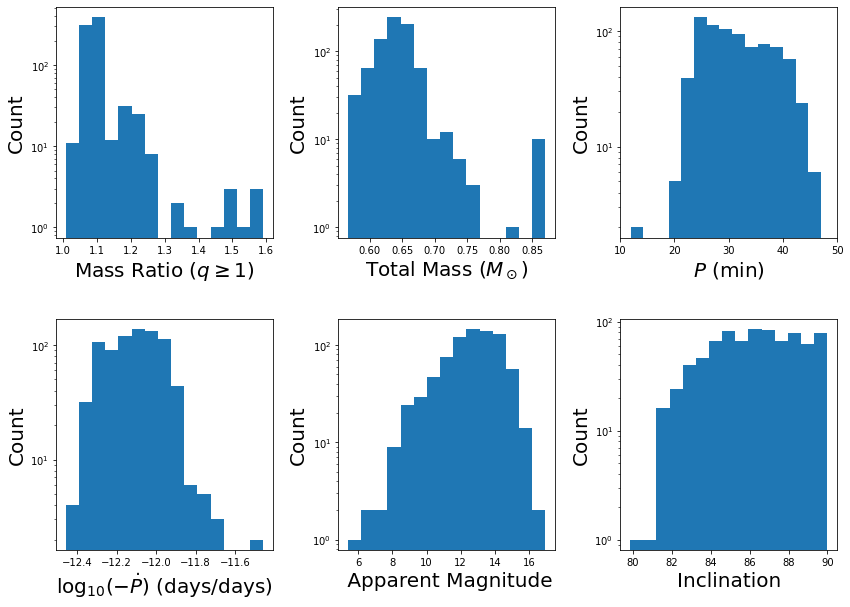

In [2]:
plt.close()

fp = '../input/light_curves_more_7day_cadence.pickle'

with open(fp, 'rb') as f:
    check = pickle.load(f)
    
params = {}

for i, ch in enumerate(check):
    params_temp = check[ch].get('params')
    if i == 0:
        params = {key: [value] for key, value in params_temp.items()}
        
    else:
        for key, value in params_temp.items():
            params[key].append(value)

params = {key: np.asarray(value) for key, value in params.items()}
show_keys = ['q', 'm_tot', 'period', 'Pdot', 'mag', 'incl']
labels = [r'Mass Ratio ($q\geq1$)', r'Total Mass ($M_\odot$)', r'$P$ (min)', r'log$_{10}(-\dot{P})$ (days/days)', ' Apparent Magnitude', 'Inclination'] # check parsec
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(hspace=0.35, wspace=0.3, right=0.9)
ax = ax.ravel()
fig.set_size_inches(14,10)

label_fontsize = 20

breaks = [10, 12]
for i in range(len(breaks) - 1):
    up = breaks[i+1]
    down = breaks[i]
    
    #inds = (np.log10(params['period']) > down) & (np.log10(params['period']) < up)
    
    inds = (params['period']<1/24.0) & (params['mag'] > down) & (params['mag'] < up)
    
    inds = np.arange(len(params['period']))
    for axis, key, label in zip(ax, show_keys, labels):
        input_val = params[key][inds]*24*60 if key == 'period' else params[key][inds]
        if key == 'Pdot':
            input_val = np.log10(-params[key][inds])

        axis.hist(input_val, bins=15, log=True)#, histtype='step')
        axis.set_xlabel(label, fontsize=label_fontsize)

for axis in ax:
    axis.set_ylabel('Count', fontsize=label_fontsize)
    
#h = ax[-1].hist2d(np.log10(params['period']), np.log10(-params['Pdot']), bins=15, norm=LogNorm())
#fig.colorbar(h[3])
#ax[-1].set_ylabel(r'$\dot{P}$ (days/days)', fontsize=label_fontsize)
#ax[-1].set_xlabel(r'$P$ (days)', fontsize=label_fontsize)

ax[2].set_xticks([10, 20, 30, 40, 50])
fig.savefig('figures/population_parameters_cosmic.pdf')

## Output Data

In [11]:
from gcex.utils.input_output import read_in_for_paper

In [14]:
with open('check_data_85.pickle', 'rb') as f:
    output_data = pickle.load(f)
    
check = read_in_for_paper('../grid_light_curves_85.pickle', true_mag=True, subtract_median=False)

In [64]:
num = 0
length = []
for c in check[0]:
    inds = np.where(c[:, 1] > 20.5)[0]
    if len(inds) != 0:
        length.append(len(inds))
        #print(inds)
        num+=1
        
        
print(num, np.mean(length))

284 7.834507042253521


In [45]:
sig = []
for recov, lc in zip(output_data['res'], check[0]):
    if np.mean(lc[:, 1]) < 17.5:
        sig.append(recov['sig'])

In [46]:
sig

[-6.5734453,
 -11.142585,
 -15.7234955,
 -8.4412155,
 -11.251048,
 -9.46107,
 -15.246812,
 -20.228666,
 -14.467749,
 -6.810229,
 -12.288816,
 -6.900664,
 -11.852999,
 -19.300266,
 -9.757636,
 -7.88051,
 -17.835196,
 -7.56522,
 -11.148419,
 -9.715846,
 -9.035108,
 -15.766216,
 -8.80074,
 -13.723998,
 -12.757772,
 -11.002804,
 -9.36291,
 -9.956522,
 -12.788002,
 -11.974424,
 -12.951916,
 -8.267894,
 -13.859231,
 -24.615574,
 -19.49162,
 -9.26481,
 -13.487526,
 -7.0767093,
 -9.105957,
 -21.464542,
 -9.750991,
 -6.7422843,
 -21.603012,
 -9.075378,
 -8.711985,
 -11.65016,
 -9.68571,
 -14.476503,
 -8.008001,
 -13.719892,
 -14.70374,
 -9.982428,
 -7.665033,
 -7.787388,
 -7.8631477,
 -9.247876,
 -8.93768,
 -8.245891,
 -7.926223,
 -8.701129,
 -9.746511,
 -10.63827,
 -13.367413,
 -13.3376665,
 -17.35722,
 -9.00528,
 -14.956744,
 -25.2576,
 -18.661705,
 -10.7887945,
 -14.901794,
 -8.407329,
 -10.536569,
 -24.467632,
 -11.738532,
 -7.246457,
 -18.933613,
 -10.884693,
 -7.570527,
 -12.348256,
 -9.3

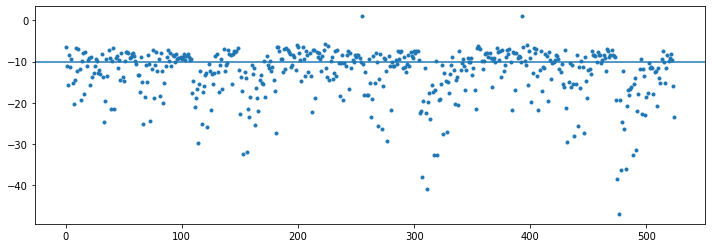

In [47]:
fig = plt.figure()
fig.set_size_inches(12, 4)
plt.plot(sig, '.')
plt.axhline(-10.0)

(-2.5, -1.4)

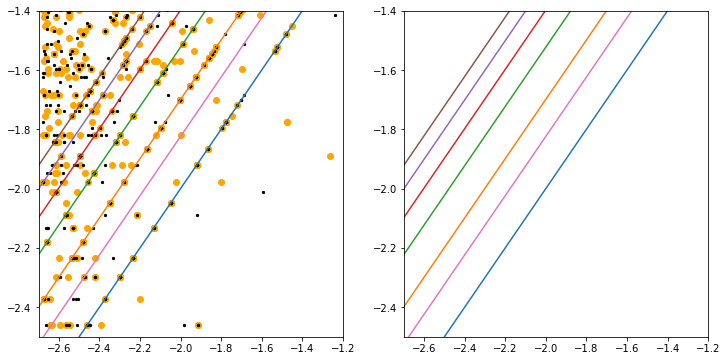

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

true_period = np.asarray([temp['period'] for temp, lc in zip(output_data['truth'], check[0]) if np.mean(lc[:, 1]) < 17.5])
pred_period = []
test_periods = 1/output_data['test_freqs']
for temp, lc in zip(output_data['res'], check[0]):
    if np.mean(lc[:, 1]) < 17.5:
        ind_freq = temp['inds_best'][1][0]
        pred_period.append(test_periods[ind_freq])

pred_period = np.asarray(pred_period)
ax1.scatter(np.log10(pred_period), np.log10(true_period), color='orange')

x = np.linspace(true_period.min()/2.0, true_period.max(), 100)
for i in range(1, 7):
    ax1.plot(np.log10(x), np.log10(x*i))

ax1.plot(np.log10(x), np.log10(x*1.5))
ax1.set_xlim(-2.7, -1.2)
ax1.set_ylim(-2.5, -1.4)


true_period = np.asarray([temp['period'] for temp, lc in zip(output_data['truth'], check[0]) if np.mean(lc[:, 1]) > 17.5])
pred_period = []
test_periods = 1/output_data['test_freqs']
for temp, lc in zip(output_data['res'], check[0]):
    if np.mean(lc[:, 1]) > 17.5:
        ind_freq = temp['inds_best'][1][0]
        pred_period.append(test_periods[ind_freq])

pred_period = np.asarray(pred_period)
ax1.scatter(np.log10(pred_period), np.log10(true_period), s=5, color='k')

x = np.linspace(true_period.min()/2.0, true_period.max(), 100)
for i in range(1, 7):
    ax2.plot(np.log10(x), np.log10(x*i))

ax2.plot(np.log10(x), np.log10(x*1.5))
ax2.set_xlim(-2.7, -1.2)
ax2.set_ylim(-2.5, -1.4)

In [52]:
import pandas as pd

In [9]:
index = ['Binary {}'.format(i) for i in range(1, 7)]
columns = ['Best Period', 'True Period', 'Period Factor', 'Best Pdot', 'True Pdot', 'Pdot Factor', 'Significance', 'CE']

df = pd.DataFrame(columns=columns)
for bin_i in range(36):
    for string in ['no', '32', '128', '512']: #, 'linspace_512']:

        if string == '32':
            fp = 'ce_out_new_test_32.pickle'
        else:
            fp = 'check_data_fast_high_mag_{}_pdot.pickle'.format(string)        

        with open(fp, 'rb') as f:
            data = pickle.load(f)

        if string == '32':
            test_freqs = data['best_params'][0]
            test_pdots = data['best_params'][1]
            value_add_dict = {}

            true_vals = data['truth'][bin_i]
            value_add_dict['Best Period'] = test_freqs[bin_i].item()*24*60
            value_add_dict['Best Pdot'] = test_pdots[bin_i].item()
            value_add_dict['Significance'] = data['significance'][bin_i].item()
            value_add_dict['CE'] = 0.0

            value_add_dict['True Pdot'] = true_vals.get('Pdot')
            value_add_dict['True Period'] = true_vals.get('period')*24*60

            value_add_dict['Period Factor'] = value_add_dict['Best Period']/value_add_dict['True Period']
            value_add_dict['Pdot Factor'] = value_add_dict['Best Pdot']/value_add_dict['True Pdot']
            row_to_add = pd.Series(value_add_dict, name='{} Pdots: Binary {}'.format(string, bin_i))

        else:
            
            test_freqs = data['test_freqs']
            test_pdots = data['test_pdots']
            value_add_dict = {}

            res_i = data['res'][bin_i]
            true_vals = data['truth'][bin_i]
            value_add_dict['Best Period'] = 1/test_freqs[res_i['inds_best'][1]].item()*24*60
            value_add_dict['Best Pdot'] = test_pdots[res_i['inds_best'][0]].item()
            value_add_dict['Significance'] = res_i['sig'].item()
            value_add_dict['CE'] = res_i['ce_best'].item()

            value_add_dict['True Pdot'] = true_vals.get('Pdot')
            value_add_dict['True Period'] = true_vals.get('period')*24*60

            value_add_dict['Period Factor'] = value_add_dict['Best Period']/value_add_dict['True Period']
            value_add_dict['Pdot Factor'] = value_add_dict['Best Pdot']/value_add_dict['True Pdot']
        
        row_to_add = pd.Series(value_add_dict, name='{} Pdots: Binary {}'.format(string, bin_i))

        df = df.append(row_to_add)

        #print('Best:', best_period, best_pdot, sig, '\n', 'True:', true_period, true_pdot, '\n')
df.to_csv('fast_results.csv')
df


,Best Period,True Period,Period Factor,Best Pdot,True Pdot,Pdot Factor,Significance,CE
no Pdots: Binary 0,5.210818,4.0,1.302705,0.000000e+00,-2.718213e-11,-0.000000,-5.644317,1.521856
32 Pdots: Binary 0,4.000001,4.0,1.000000,-5.000000e-11,-2.718213e-11,1.839444,39.627632,0.000000
128 Pdots: Binary 0,4.000000,4.0,1.000000,-2.699314e-11,-2.718213e-11,0.993047,-26.077915,1.286132
512 Pdots: Binary 0,4.000000,4.0,1.000000,-2.709101e-11,-2.718213e-11,0.996648,-37.884048,1.149979
no Pdots: Binary 1,3.293320,5.0,0.658664,0.000000e+00,-1.873988e-11,-0.000000,-5.908869,1.432911
...,...,...,...,...,...,...,...,...
512 Pdots: Binary 34,19.000007,38.0,0.500000,-3.032137e-12,-6.378875e-13,4.753404,-12.504211,1.453681
no Pdots: Binary 35,3.755684,39.0,0.096300,0.000000e+00,-6.108611e-13,-0.000000,-6.290090,1.465590
32 Pdots: Binary 35,3.389097,39.0,0.086900,-4.309768e-11,-6.108611e-13,70.552343,8.103388,0.000000
128 Pdots: Binary 35,4.182029,39.0,0.107232,-9.431061e-12,-6.108611e-13,15.438963,-7.461745,1.457228


In [9]:
index = ['Binary {}'.format(i) for i in range(1, 7)]
columns = ['Best Period', 'True Period', 'Period Factor', 'Best Pdot', 'True Pdot', 'Pdot Factor', 'Significance', 'CE']

df3 = pd.DataFrame(columns=columns)
for bin_i in range(36):
    for string in ['no', '32']: #, '128', '512']: #, 'linspace_512']:

        fp = 'test_verify_new_speed_{}_pdot.pickle'.format(string)        

        with open(fp, 'rb') as f:
            data = pickle.load(f)

        test_freqs = data['test_freqs']
        test_pdots = data['test_pdots']
        value_add_dict = {}
    
        res_i = data['res'][bin_i]
        true_vals = data['truth'][bin_i]
        value_add_dict['Best Period'] = 1/test_freqs[res_i['inds_best'][1]].item()*24*60
        value_add_dict['Best Pdot'] = test_pdots[res_i['inds_best'][0]].item()
        value_add_dict['Significance'] = res_i['sig'].item()
        value_add_dict['CE'] = res_i['ce_best'].item()

        value_add_dict['True Pdot'] = true_vals.get('Pdot')
        value_add_dict['True Period'] = true_vals.get('period')*24*60

        value_add_dict['Period Factor'] = value_add_dict['Best Period']/value_add_dict['True Period']
        value_add_dict['Pdot Factor'] = value_add_dict['Best Pdot']/value_add_dict['True Pdot']
        row_to_add = pd.Series(value_add_dict, name='{} Pdots: Binary {}'.format(string, bin_i))

        df3 = df3.append(row_to_add)

        #print('Best:', best_period, best_pdot, sig, '\n', 'True:', true_period, true_pdot, '\n')
#df.to_csv('fast_results.csv')
df3


,Best Period,True Period,Period Factor,Best Pdot,True Pdot,Pdot Factor,Significance,CE
no Pdots: Binary 0,3.887467,4.0,0.971867,0.000000e+00,-2.718213e-11,-0.000000,-6.301855,1.514970
32 Pdots: Binary 0,4.000001,4.0,1.000000,-2.759977e-11,-2.718213e-11,1.015365,-33.746890,1.198171
no Pdots: Binary 1,3.704861,5.0,0.740972,0.000000e+00,-1.873988e-11,-0.000000,-5.789499,1.536262
32 Pdots: Binary 1,10.000000,5.0,2.000000,-3.714820e-11,-1.873988e-11,1.982307,-29.958924,1.243970
no Pdots: Binary 2,3.107860,6.0,0.517977,0.000000e+00,-1.382923e-11,-0.000000,-5.823720,1.551160
...,...,...,...,...,...,...,...,...
32 Pdots: Binary 33,3.710637,37.0,0.100287,-1.414435e-12,-6.668793e-13,2.120976,-7.190735,1.211757
no Pdots: Binary 34,9.499998,38.0,0.250000,0.000000e+00,-6.378875e-13,-0.000000,-7.799434,1.204808
32 Pdots: Binary 34,19.000007,38.0,0.500000,-2.562403e-12,-6.378875e-13,4.017014,-12.929920,1.167485
no Pdots: Binary 35,3.812001,39.0,0.097744,0.000000e+00,-6.108611e-13,-0.000000,-5.776569,1.298237


In [3]:
index = ['Binary {}'.format(i) for i in range(1, 7)]
columns = ['Best Period', 'True Period', 'Period Factor', 'Best Pdot', 'True Pdot', 'Pdot Factor', 'Significance', 'CE']

df2 = pd.DataFrame(columns=columns)
num_light_curve_sets = 10
for i in range(num_light_curve_sets):
    for bin_i in range(36):
        for string in ['no', '32', '128']:#, '512']: #, 'linspace_512']:
            #print(string, i, bin_i)
            fp = 'out_gce_{}_{}_pdot.pickle'.format(i, string)        

            with open(fp, 'rb') as f:
                data = pickle.load(f)

            test_freqs = data['test_freqs']
            test_pdots = data['test_pdots']
            value_add_dict = {}

            res_i = data['res'][bin_i]
            true_vals = data['truth'][bin_i]
            value_add_dict['Best Period'] = 1/test_freqs[res_i['inds_best'][1]].item()*24*60
            value_add_dict['Best Pdot'] = test_pdots[res_i['inds_best'][0]].item()
            value_add_dict['Significance'] = res_i['sig'].item()
            value_add_dict['CE'] = res_i['ce_best'].item()

            value_add_dict['True Pdot'] = true_vals.get('Pdot')
            value_add_dict['True Period'] = true_vals.get('period')*24*60

            value_add_dict['Period Factor'] = value_add_dict['Best Period']/value_add_dict['True Period']
            value_add_dict['Pdot Factor'] = value_add_dict['Best Pdot']/value_add_dict['True Pdot']
            row_to_add = pd.Series(value_add_dict, name='{} Pdots/iter {}: Binary {}'.format(string, i, bin_i))

            df2 = df2.append(row_to_add)

            #print('Best:', best_period, best_pdot, sig, '\n', 'True:', true_period, true_pdot, '\n')

df2

,Best Period,True Period,Period Factor,Best Pdot,True Pdot,Pdot Factor,Significance,CE
no Pdots/iter 0: Binary 0,9.197942,4.0,2.299486,0.000000e+00,-2.718213e-11,-0.000000,-5.897257,1.523046
32 Pdots/iter 0: Binary 0,4.000001,4.0,1.000000,-2.759977e-11,-2.718213e-11,1.015365,-31.561447,1.205893
128 Pdots/iter 0: Binary 0,3.999999,4.0,1.000000,-2.699314e-11,-2.718213e-11,0.993047,-24.631594,1.291662
no Pdots/iter 0: Binary 1,3.134078,5.0,0.626816,0.000000e+00,-1.873988e-11,-0.000000,-5.834662,1.376568
32 Pdots/iter 0: Binary 1,10.000000,5.0,2.000000,-3.714820e-11,-1.873988e-11,1.982307,-27.566208,1.114437
...,...,...,...,...,...,...,...,...
32 Pdots/iter 9: Binary 34,19.000007,38.0,0.500000,-3.448893e-12,-6.378875e-13,5.406741,-10.679519,1.473447
128 Pdots/iter 9: Binary 34,19.000007,38.0,0.500000,-2.650815e-12,-6.378875e-13,4.155615,-11.642598,1.465991
no Pdots/iter 9: Binary 35,56.095599,39.0,1.438349,0.000000e+00,-6.108611e-13,-0.000000,-5.738905,1.548098
32 Pdots/iter 9: Binary 35,3.844586,39.0,0.098579,-9.058046e-13,-6.108611e-13,1.482832,-7.949219,1.531482


In [225]:
sig_pdot

array([[-30.38447189, -35.23857117, -33.24312973, -33.29191589,
        -34.61786652, -42.16875839, -32.24723816, -30.2868824 ,
        -27.0168457 , -32.8105011 ],
       [-25.53218842, -27.07086563, -28.33737946, -21.00599098,
        -26.628088  , -23.09133148, -25.72603607, -24.60450172,
        -24.94971085, -23.81835938],
       [-26.49411392, -29.01069832, -30.52396011, -29.64222527,
        -28.50993919, -30.42421532, -25.80631256, -28.77552986,
        -29.48357964, -27.51563072],
       [-37.0522995 , -29.23014069, -31.61946869, -24.82556343,
        -28.40643311, -31.02088928, -29.94538498, -27.89287186,
        -32.89482117, -32.90283966],
       [-26.73760796, -33.27121353, -29.46609688, -35.29134369,
        -32.24903107, -32.7287941 , -26.29873276, -27.63087273,
        -27.02075005, -28.96973991],
       [-30.66131973, -33.07826233, -33.02078629, -27.88760185,
        -28.18258667, -30.57066727, -35.90744781, -33.4876976 ,
        -33.11927795, -34.20523453],
       [-2

In [224]:
sig_pdot = np.asarray([df['Significance']['{} Pdots/iter {}: Binary {}'.format('32', j, i)] for i in range(36) for j in range(10)]).reshape(36, 10)
sig_no_pdots = np.asarray([df['Significance']['{} Pdots/iter {}: Binary {}'.format('no', j, i)] for i in range(36) for j in range(10)]).reshape(36, 10)
true_periods = np.asarray([df['True Period']['{} Pdots/iter {}: Binary {}'.format('32', 0, i)] for i in range(36)])


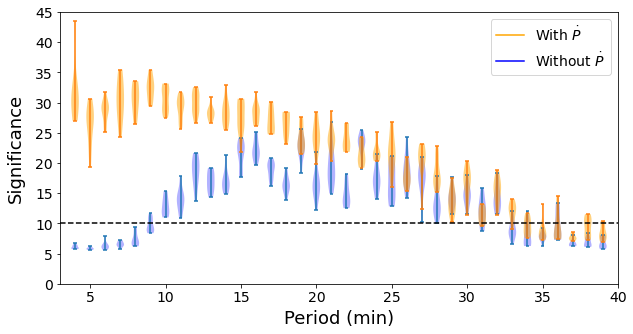

In [4]:
fig = plt.figure()

sig_pdot = np.asarray([df2['Significance']['{} Pdots/iter {}: Binary {}'.format('32', j, i)] for i in range(36) for j in range(10)]).reshape(36, 10).T#, axis=1)
sig_no_pdots = np.asarray([df2['Significance']['{} Pdots/iter {}: Binary {}'.format('no', j, i)] for i in range(36) for j in range(10)]).reshape(36, 10).T#, axis=1)
true_periods = np.asarray([df2['True Period']['{} Pdots/iter {}: Binary {}'.format('32', 0, i)] for i in range(36)])

parts = plt.violinplot(-sig_no_pdots, positions=true_periods)#, label=r'With $\dot{P}$')
for pc in parts['bodies']:
    pc.set_facecolor('blue')

parts = plt.violinplot(-sig_pdot, positions=true_periods)#, label=r'Without $\dot{P}$')
for pc in parts['bodies']:
    pc.set_facecolor('orange')
    pc.set_alpha(0.5)
#sig_pdot = np.asarray([df['Significance']['{} Pdots: Binary {}'.format('512', i)] for i in range(36)])
#sig_no_pdots = np.asarray([df['Significance']['{} Pdots: Binary {}'.format('no', i)] for i in range(36)])
#true_periods = np.asarray([df['True Period']['{} Pdots: Binary {}'.format('512', i)] for i in range(36)])

#plt.plot(true_periods, -sig_no_pdots, '.')
#plt.plot(true_periods, -sig_pdot, '.')


#sig_pdot = np.asarray([df1['Significance']['{} Pdots: Binary {}'.format('512', i)] for i in range(107)])
#sig_no_pdots = np.asarray([df1['Significance']['{} Pdots: Binary {}'.format('no', i)] for i in range(107)])
#true_periods = np.asarray([df1['True Period']['{} Pdots: Binary {}'.format('512', i)] for i in range(107)])

#plt.plot(true_periods, -sig_no_pdots, '.')

#plt.plot(true_periods, -sig_pdot, '.')
plt.plot([-1000, -1000], [-1000, -2000], label=r'With $\dot{P}$', color='orange')
plt.plot([-1000, -1000], [-1000, -2000], label=r'Without $\dot{P}$', color='blue')
fig.set_size_inches(10,5)
plt.axhline(10.0, color='k', ls='--')
plt.xlabel('Period (min)', fontsize=18)
plt.ylabel('Significance', fontsize=18, labelpad=10)
plt.ylim(0, 45)
plt.xlim(3, 40)
ax = plt.gca()
plt.legend(loc='upper right', prop=dict(size=14))
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('figures/significance_difference.pdf', dpi=200)

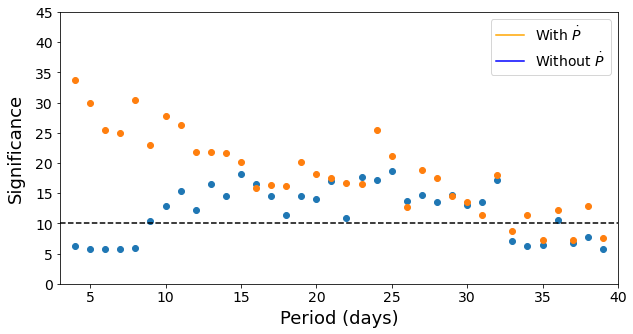

In [15]:
fig = plt.figure()

sig_pdots = np.asarray([df3['Significance']['{} Pdots: Binary {}'.format('32', i)] for i in range(36)])
sig_no_pdots = np.asarray([df3['Significance']['{} Pdots: Binary {}'.format('no', i)] for i in range(36)])
true_periods = np.asarray([df3['True Period']['{} Pdots: Binary {}'.format('32', i)] for i in range(36)])

parts = plt.scatter(true_periods, -sig_no_pdots)#, label=r'With $\dot{P}$')
#for pc in parts['bodies']:
#    pc.set_facecolor('blue')

parts = plt.scatter(true_periods, -sig_pdots)#, label=r'Without $\dot{P}$')
#for pc in parts['bodies']:
#    pc.set_facecolor('orange')
#    pc.set_alpha(0.5)
#sig_pdot = np.asarray([df['Significance']['{} Pdots: Binary {}'.format('512', i)] for i in range(36)])
#sig_no_pdots = np.asarray([df['Significance']['{} Pdots: Binary {}'.format('no', i)] for i in range(36)])
#true_periods = np.asarray([df['True Period']['{} Pdots: Binary {}'.format('512', i)] for i in range(36)])

#plt.plot(true_periods, -sig_no_pdots, '.')
#plt.plot(true_periods, -sig_pdot, '.')


#sig_pdot = np.asarray([df1['Significance']['{} Pdots: Binary {}'.format('512', i)] for i in range(107)])
#sig_no_pdots = np.asarray([df1['Significance']['{} Pdots: Binary {}'.format('no', i)] for i in range(107)])
#true_periods = np.asarray([df1['True Period']['{} Pdots: Binary {}'.format('512', i)] for i in range(107)])

#plt.plot(true_periods, -sig_no_pdots, '.')

#plt.plot(true_periods, -sig_pdot, '.')
plt.plot([-1000, -1000], [-1000, -2000], label=r'With $\dot{P}$', color='orange')
plt.plot([-1000, -1000], [-1000, -2000], label=r'Without $\dot{P}$', color='blue')
fig.set_size_inches(10,5)
plt.axhline(10.0, color='k', ls='--')
plt.xlabel('Period (days)', fontsize=18)
plt.ylabel('Significance', fontsize=18, labelpad=10)
plt.ylim(0, 45)
plt.xlim(3, 40)
ax = plt.gca()
plt.legend(loc='upper right', prop=dict(size=14))
ax.tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('figures/significance_difference.pdf', dpi=200)

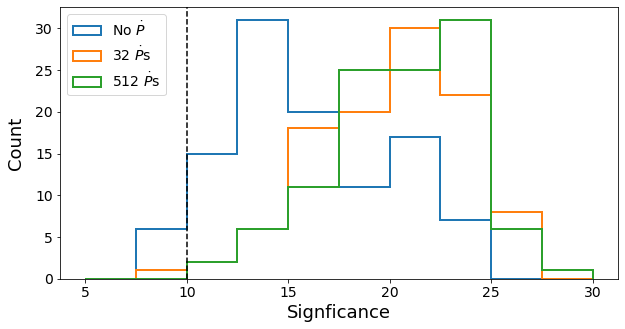

In [5]:
fig = plt.figure()
fig.set_size_inches(10, 5)
bins = np.arange(5.0, 32.5, 2.5)
for num_pdots, label in zip(['no', '32', '512'], [r'No $\dot{P}$', '32 $\dot{P}$s', '512 $\dot{P}$s']):
    for dataF, num in zip([df1], [107]):
        sig = -np.asarray([dataF['Significance']['{} Pdots: Binary {}'.format(num_pdots, i)] for i in range(num)])
        plt.hist(sig, bins=bins, histtype='step', label=label, lw=2)
        
plt.xlabel('Signficance', fontsize=18)
plt.ylabel('Count', fontsize=18, labelpad=10)
ax = plt.gca()

ax.tick_params(axis='both', which='major', labelsize=14)
ax.axvline(10, ls='dashed', color='k')
plt.legend(loc='upper left', prop=dict(size=14))
fig.savefig('figures/cosmic_sig_histogram.pdf', dpi=200)

### strings = [32, 128, 512]
colors = ['red', 'orange', 'green']
sizes = [140, 90, 15]

true_periods = np.asarray([df['True Period']['{} Pdots: Binary {}'.format(512, i)] for i in range(7)])
true_pdots = [df['True Pdot']['{} Pdots: Binary {}'.format(512, i)] for i in range(7)]

plt.scatter(true_periods*24*60, -np.log10(-np.asarray(true_pdots)), s=300, color='blue', label='True')

for string, color, size in zip(strings, colors, sizes): 
    best_periods = np.asarray([df['Best Period']['{} Pdots: Binary {}'.format(string, i)] for i in range(7)])
    best_pdots = [df['Best Pdot']['{} Pdots: Binary {}'.format(string, i)] for i in range(7)]
    plt.scatter(best_periods*24*60, -np.log10(-np.asarray(true_pdots)), s=size, color=color, label=str(string) + r' $\dot{P}$s')


plt.xlabel('Period (min)', fontsize=16)
plt.ylabel(r'-log$_{10}$$\dot{P}$ (min/min)', fontsize=16)
plt.legend(loc='lower right')
ax = plt.gca()

ax.tick_params('both', labelsize=14)
plt.savefig('figures/pdot_period_fast_comparison.pdf', dpi=200)

19.43168229980152


Text(0.5, 0, 'Normalized Folded Phase')

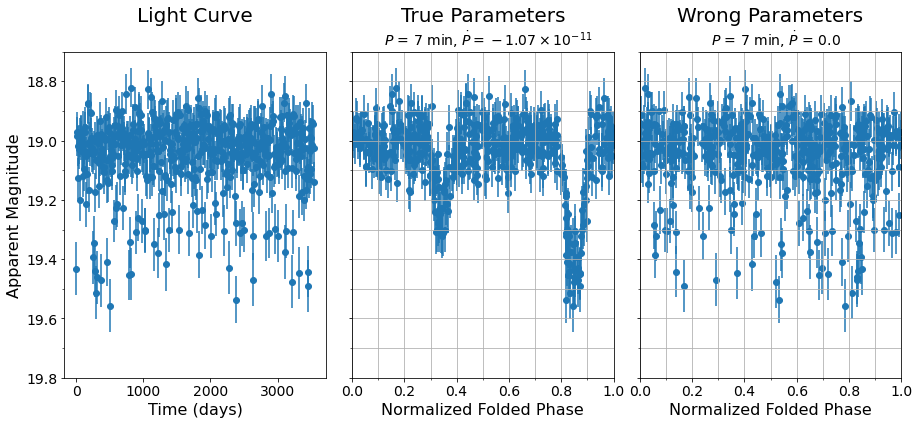

In [3]:
import pickle
with open('../input/grid_light_curves_fast_19.pickle', 'rb') as f:
    check = pickle.load(f)

keys = list(check.keys())

plt.close()
fig, ax = plt.subplots(1, 3, sharey=True)
ax = ax.ravel()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.set_size_inches(15.0, 6.0)

titles = ['Light Curve', 'True Parameters', 'Wrong Parameters']

for (ax_i, title) in zip(ax, titles):
    ax_i.set_title(title, fontsize=20, pad=30)

for ax_i in ax:
    ax_i.tick_params('both', labelsize=14)

ind = 3
binary = check[keys[ind]]

input_dict = binary.get('params')

#print(input_dict.get('incl'))
#print(pdot.shape)

lcs = [np.array([binary.get('t'), binary.get('true_mag'), binary.get('err')]).T]
#print(pdot.max())

period = input_dict['period']
frequency = 1./period
pdot = input_dict['Pdot']


wrong_period = period
wrong_pdot = 0.0
wrong_frequency = 1/wrong_period

t = lcs[0][:,0] + np.random.rand()
mags = lcs[0][:,1]
print(mags[0])
errors = lcs[0][:,2]

#print(mags.min() - np.median(mags))

fold = np.fmod(t-0.5*pdot*frequency*(t*t), period)*frequency
wrong_fold = np.fmod(t-0.5*wrong_pdot*wrong_frequency*(t*t), wrong_period)*wrong_frequency
#print(wrong_fold.min(), wrong_fold.max())

ax[0].errorbar(t, mags, yerr=errors, fmt='o', zorder=1)
ax[1].errorbar(fold, mags, yerr=errors, fmt='o', zorder=1)
ax[2].errorbar(wrong_fold, mags, yerr=errors, fmt='o', zorder=1)

"""
ax[0].scatter(t, mags, s=10, color='orange', zorder=10)
ax[1].scatter(fold, mags, s=10, color='orange', zorder=10)
ax[2].scatter(wrong_fold, mags, s=10, color='orange', zorder=10)
"""

for ax_i in ax:
    ax_i.set_ylim(19.8, 18.7)
    
#ax[0].set_yticks([19.4, 19.3, 19.2, 19.1, 19.0])

limits = (0.7, 1.05)
#ax[0].set_ylim(*limits)

#ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8])
for ax_i in ax[1:3]:
    ax_i.set_xlim(0.0, 1.0)
    ax_i.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.grid(True, which='both')

ax[1].text(0.52, 1.02, r'$P$ = 7 min, $\dot{P} = -1.07\times10^{-11}$',
                   transform=ax[1].transAxes,
                   ha='center', fontsize=14)

ax[2].text(0.52, 1.02, r'$P$ = 7 min, $\dot{P}$ = 0.0',
                   transform=ax[2].transAxes,
                   ha='center', fontsize=14)

#ax[0].set_ylim(0.85, 1.05)
for i in range(7):
    ax[0].set_ylabel('Apparent Magnitude', fontsize=16)

ax[0].set_xlabel('Time (days)', fontsize=16)
ax[1].set_xlabel('Normalized Folded Phase', fontsize=16)
ax[2].set_xlabel('Normalized Folded Phase', fontsize=16)
#fig.savefig('figures/light_curve_comp_{}_pdots.pdf'.format(string), dpi=200)
#fig.savefig('figures/light_curve_example_19.pdf', dpi=200)
#print("correct period:", period*24*60, "correct pdot:", pdot)
#print("wrong period:", wrong_period*24*60, "wrong pdot:", wrong_pdot)

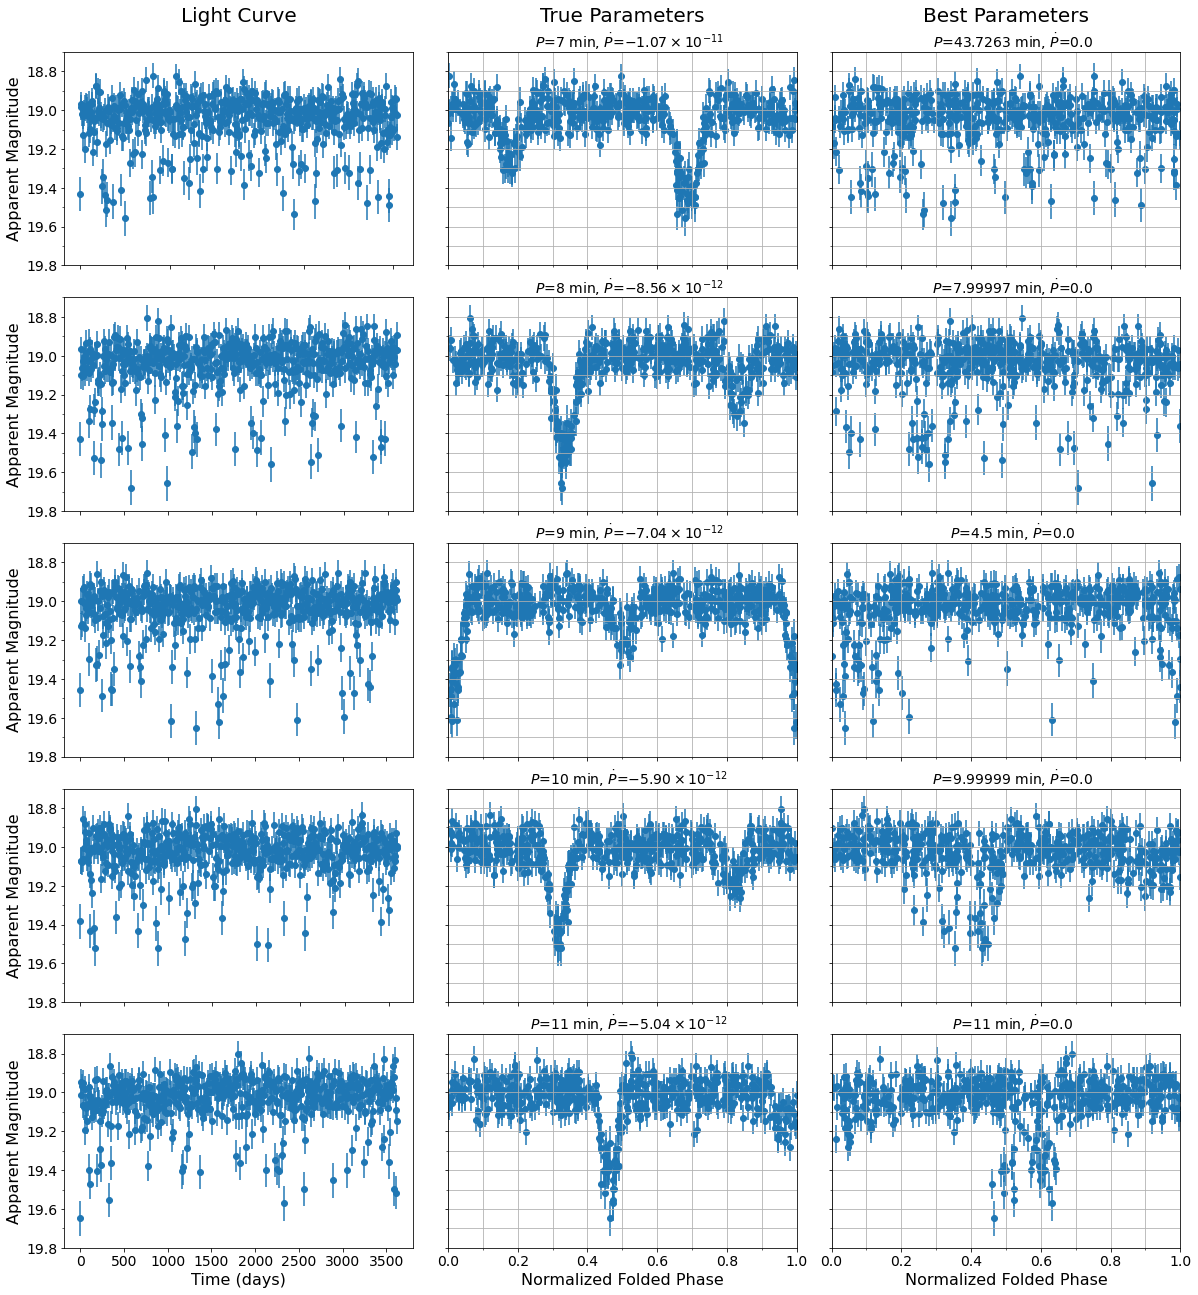

In [6]:
import pickle
with open('../input/grid_light_curves_fast_19.pickle', 'rb') as f:
    check = pickle.load(f)

keys = list(check.keys())

true_pdots = [r'$-1.07\times10^{-11}$',
              r'$-8.56\times10^{-12}$',
              r'$-7.04\times10^{-12}$', 
              r'$-5.90\times10^{-12}$',
              r'$-5.04\times10^{-12}$']

for string in ['no']:#, '32', '128', '512']:
    plt.close()
    fig, ax = plt.subplots(5, 3, sharey=True)
    ax = ax.ravel()
    plt.subplots_adjust(wspace=0.1, hspace=0.15)
    fig.set_size_inches(20.0, 22.0)

    titles = ['Light Curve', 'True Parameters', 'Best Parameters']

    for (ax_i, title) in zip(ax, titles):
        ax_i.set_title(title, fontsize=20, pad=30)

    for ax_i in ax:
        ax_i.tick_params('both', labelsize=14)


    for ax_i in ax[0:12]:
        labels = [item.get_text() for item in ax_i.get_xticklabels()]

        empty_string_labels = ['']*len(labels)
        ax_i.set_xticklabels(empty_string_labels)

    for ind in range(5):
        plus = 3
        times = 1
        binary = check[keys[ind*times + plus]]

        input_dict = binary.get('params')

        #print(input_dict.get('incl'))
        #print(pdot.shape)

        lcs = [np.array([binary.get('t'), binary.get('true_mag'), binary.get('err')]).T]
        #print(pdot.max())

        period = input_dict['period']
        frequency = 1./period
        pdot = input_dict['Pdot']


        wrong_period =  df['Best Period']['{} Pdots: Binary {}'.format(string, ind*times + plus)]/(24*60)  # np.abs((1+np.random.randn()))*period
        wrong_pdot = df['Best Pdot']['{} Pdots: Binary {}'.format(string, ind*times + plus)] #pdot*4 # (1+np.random.randn())*pdot
        wrong_frequency = 1/wrong_period

        t = lcs[0][:,0] + np.random.rand()
        mags = lcs[0][:,1]
        errors = lcs[0][:, 2]

        #print(mags.min() - np.median(mags))

        fold = np.fmod(t-0.5*pdot*frequency*(t*t), period)*frequency
        wrong_fold = np.fmod(t-0.5*wrong_pdot*wrong_frequency*(t*t), wrong_period)*wrong_frequency
        #print(wrong_fold.min(), wrong_fold.max())
        
        #print(mags)
        ax[ind*3 + 0].errorbar(t, mags, yerr=errors, fmt='o', zorder=1)
        ax[ind*3 + 1].errorbar(fold, mags, yerr=errors, fmt='o', zorder=1)
        ax[ind*3 + 2].errorbar(wrong_fold, mags, yerr=errors, fmt='o', zorder=1)

        limits = (0.7, 1.05)
        #ax[0].set_ylim(*limits)

        #ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8])
        for ax_i in ax[ind*3 + 1:ind*3+3]:
            ax_i.set_xlim(0.0, 1.0)
            ax_i.xaxis.set_minor_locator(AutoMinorLocator(2))
            ax_i.yaxis.set_minor_locator(AutoMinorLocator(2))
            ax_i.grid(True, which='both')

        ax[3*ind + 1].text(0.52, 1.02, r'$P$=%d min, $\dot{P}$=%s'%(period*24*60, true_pdots[ind]),
                           transform=ax[3*ind + 1].transAxes,
                           ha='center', fontsize=14)

        ax[3*ind + 2].text(0.52, 1.02, r'$P$=%.6g min, $\dot{P}$=0.0'%(wrong_period*24*60),
                           transform=ax[3*ind + 2].transAxes, ha='center', fontsize=14)

    for ax_i in ax:
        ax_i.set_ylim(19.8, 18.7)
    #ax[0].set_ylim(0.85, 1.05)
    for i in range(5):
        ax[3*i].set_ylabel('Apparent Magnitude', fontsize=16)

    ax[12].set_xlabel('Time (days)', fontsize=16)
    ax[13].set_xlabel('Normalized Folded Phase', fontsize=16)
    ax[14].set_xlabel('Normalized Folded Phase', fontsize=16)
    #fig.savefig('figures/light_curve_comp_{}_pdots.pdf'.format(string), dpi=200)
    fig.savefig('figures/pdot_break_visual_19.pdf', dpi=200)
    #print("correct period:", period*24*60, "correct pdot:", pdot)
    #print("wrong period:", wrong_period*24*60, "wrong pdot:", wrong_pdot)

In [11]:
index = ['Binary {}'.format(i) for i in range(1, 7)]
columns = ['Best Period', 'True Period', 'Period Factor', 'Best Pdot', 'True Pdot', 'Pdot Factor', 'Significance']

df1 = pd.DataFrame(columns=columns)
for bin_i in range(107):
    for string in ['no', '32', '512']:

        fp = 'check_data_cosmic_{}_pdot.pickle'.format(string)        

        with open(fp, 'rb') as f:
            data = pickle.load(f)

        test_freqs = data['test_freqs']
        test_pdots = data['test_pdots']
        value_add_dict = {}
    
        res_i = data['res'][bin_i]
        true_vals = data['truth'][bin_i]
        value_add_dict['Best Period'] = 1/test_freqs[res_i['inds_best'][1]]
        if len(value_add_dict['Best Period']) > 1:
            if len(np.unique(value_add_dict['Best Period'])) == 1:
                value_add_dict['Best Period'] = value_add_dict['Best Period'][0]
                
            else:
                value_add_dict['Best Period'] = -len(np.unique(value_add_dict['Best Period']))
                
        else:
             value_add_dict['Best Period'] = value_add_dict['Best Period'][0]
        
        value_add_dict['Best Pdot'] = test_pdots[res_i['inds_best'][0]]
        if len(value_add_dict['Best Pdot']) > 1:
            if len(np.unique(value_add_dict['Best Pdot'])) == 1:
                value_add_dict['Best Pdot'] = value_add_dict['Best Pdot'][0]
                
            else:
                value_add_dict['Best Pdot'] = -len(np.unique(value_add_dict['Best Pdot']))
                
        else:
             value_add_dict['Best Pdot'] = value_add_dict['Best Pdot'][0]
                
        value_add_dict['Best Period'] *= 24*60   
        #value_add_dict['Best Pdot'] = test_pdots[res_i['inds_best'][0]].item()
        value_add_dict['Significance'] = res_i['sig'].item()

        value_add_dict['True Pdot'] = true_vals.get('Pdot')
        value_add_dict['True Period'] = true_vals.get('period')*24*60

        value_add_dict['Period Factor'] = value_add_dict['Best Period']/value_add_dict['True Period']
        value_add_dict['Pdot Factor'] = value_add_dict['Best Pdot']/value_add_dict['True Pdot']
        row_to_add = pd.Series(value_add_dict, name='{} Pdots: Binary {}'.format(string, bin_i))

        df1 = df1.append(row_to_add)

        #print('Best:', best_period, best_pdot, sig, '\n', 'True:', true_period, true_pdot, '\n')

df1.to_csv('figures/cosmic_periods.csv')     
print(df1['Significance'].max())
df1

-7.6608123779296875


,Best Period,True Period,Period Factor,Best Pdot,True Pdot,Pdot Factor,Significance
no Pdots: Binary 0,6.078329,12.156664,0.5,0.000000e+00,-3.342411e-12,-0.000000,-16.924391
32 Pdots: Binary 0,12.156667,12.156664,1.0,-5.000000e-12,-3.342411e-12,1.495926,-24.145992
512 Pdots: Binary 0,6.078331,12.156664,0.5,-1.115091e-12,-3.342411e-12,0.333619,-25.944204
no Pdots: Binary 1,19.465914,19.465915,1.0,0.000000e+00,-2.157786e-12,-0.000000,-12.939814
32 Pdots: Binary 1,9.732957,19.465915,0.5,-8.544629e-13,-2.157786e-12,0.395991,-20.502777
...,...,...,...,...,...,...,...
32 Pdots: Binary 105,12.420207,24.840411,0.5,-1.605908e-12,-1.042452e-12,1.540511,-18.430103
512 Pdots: Binary 105,12.420207,24.840411,0.5,-1.561713e-12,-1.042452e-12,1.498116,-19.074831
no Pdots: Binary 106,26.524493,26.524490,1.0,0.000000e+00,-1.042437e-12,-0.000000,-11.633064
32 Pdots: Binary 106,26.524493,26.524490,1.0,-3.424156e-12,-1.042437e-12,3.284761,-16.581991


(array([10., 39., 51., 58., 38., 47., 31., 27., 16.,  4.]),
 array([-27.78042412, -25.76846294, -23.75650177, -21.7445406 ,
        -19.73257942, -17.72061825, -15.70865707, -13.6966959 ,
        -11.68473473,  -9.67277355,  -7.66081238]),
 <a list of 10 Patch objects>)

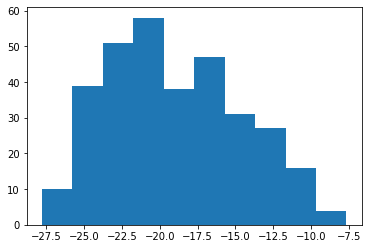

In [60]:
plt.hist(df1['Significance'])

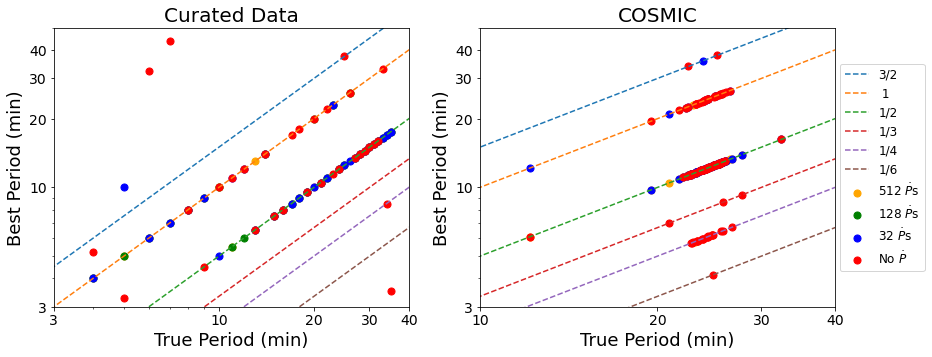

In [12]:
days_to_min = 24*60
#plt.scatter(df1['True Period']*days_to_min, df1['Best Period']*days_to_min, s=50, label='COSMIC', color='orange')
xs = np.linspace(1e-4*days_to_min, 1e-1*days_to_min)

# fast sources

fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
plt.subplots_adjust(top=0.9)
fig.set_size_inches(14, 5)
for i, (ax, df_trans, num, title) in enumerate(zip(axes, [df, df1], [32, 107], ['Curated Data', 'COSMIC'])):
    
    best_periods = np.asarray([df_trans['Best Period']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    true_periods = np.asarray([df_trans['True Period']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    size = -np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    ax.scatter(true_periods, best_periods, s=50, color='orange', label=r'512 $\dot{P}$s')

    if title == 'Curated Data':
        
    
        best_periods = np.asarray([df_trans['Best Period']['{} Pdots: Binary {}'.format('128', i)] for i in range(num)])
        true_periods = np.asarray([df_trans['True Period']['{} Pdots: Binary {}'.format('128', i)] for i in range(num)])
        size = -np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('128', i)] for i in range(num)])
        ax.scatter(true_periods, best_periods, s=50, color='green', label=r'128 $\dot{P}$s')

    best_periods = np.asarray([df_trans['Best Period']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    true_periods = np.asarray([df_trans['True Period']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    size = -np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    ax.scatter(true_periods, best_periods, s=50, color='blue', label=r'32 $\dot{P}$s')
    
    best_periods = np.asarray([df_trans['Best Period']['{} Pdots: Binary {}'.format('no', i)] for i in range(num)])
    true_periods = np.asarray([df_trans['True Period']['{} Pdots: Binary {}'.format('no', i)] for i in range(num)])
    size = -np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('no', i)] for i in range(num)])
    ax.scatter(true_periods, best_periods, s=50, color='red', label=r'No $\dot{P}$')
    ax.set_title(title, fontsize=20)
    
    
labels = ['3/2', ' 1 ', '1/2', '1/3', '1/4', '1/6']
factors = [0.666666666, 1, 2, 3, 4, 6]
for ax in axes:
    for i, lab in zip(factors, labels):
        ax.loglog(xs, xs/i, label=lab, ls='--')

    ax.set_xticks([3, 10, 20, 30, 40])
    ax.set_xticklabels([3, 10, 20, 30, 40], fontsize=14)

    ax.set_yticks([3, 10, 20, 30, 40])
    ax.set_yticklabels([3, 10, 20, 30, 40], fontsize=14)

    ax.set_ylim(3, 50)
    
    ax.set_xlabel('True Period (min)', fontsize=18)
    ax.set_ylabel('Best Period (min)', fontsize=18)
    
axes[0].set_xlim(3, 40)
axes[1].set_xlim(10, 40)
axes[0].legend(loc='center right', bbox_to_anchor=[2.47, 0.5], ncol=1, prop=dict(size=12))
#plt.savefig('figures/true_vs_best.pdf', dpi=200)

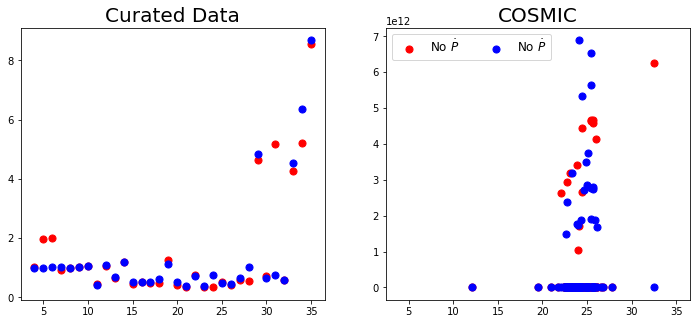

In [127]:
days_to_min = 24*60
#plt.scatter(df1['True Period']*days_to_min, df1['Best Period']*days_to_min, s=50, label='COSMIC', color='orange')
xs = np.linspace(1e-4*days_to_min, 1e-1*days_to_min)

# fast sources

fig, axes = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_size_inches(12, 5)
for i, (ax, df_trans, num, title) in enumerate(zip(axes, [df, df1], [32, 107], ['Curated Data', 'COSMIC'])):

    best_pdots = np.asarray([df_trans['Best Pdot']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    true_pdots = np.asarray([df_trans['True Pdot']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    true_periods = np.asarray([df_trans['True Period']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    #size = -np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    ax.scatter(true_periods, best_pdots/true_pdots, s=50, color='red', label=r'No $\dot{P}$')
    ax.set_title(title, fontsize=20)
    
    best_pdots = np.asarray([df_trans['Best Pdot']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    true_pdots = np.asarray([df_trans['True Pdot']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    true_periods = np.asarray([df_trans['True Period']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    #size = -np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('32', i)] for i in range(num)])
    ax.scatter(true_periods, best_pdots/true_pdots, s=50, color='blue', label=r'No $\dot{P}$')
    
    #best_pdots = np.asarray([df_trans['Best Pdot']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    #true_periods = np.asarray([df_trans['True Pdot']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    #size = -np.asarray([df_trans['Significance']['{} Pdots: Binary {}'.format('512', i)] for i in range(num)])
    #ax.scatter(-np.log10(-true_periods), -np.log10(-best_periods), s=50, color='blue', label=r'With $\dot{P}$')

    
labels = ['3/2', ' 1 ', '1/2', '1/3', '1/4', '1/6']
factors = [0.666666666, 1, 2, 3, 4, 6]
#for ax in axes:
#    for i, lab in zip(factors, labels):
#        ax.loglog(xs, xs/i, label=lab, ls='--')

    #ax.set_xticks([3, 10, 20, 30, 40])
    #ax.set_xticklabels([3, 10, 20, 30, 40], fontsize=14)

    #ax.set_yticks([3, 10, 20, 30, 40])
    #ax.set_yticklabels([3, 10, 20, 30, 40], fontsize=14)

    #ax.set_xlim(3, 40)
    #ax.set_ylim(3, 100)
    #ax.set_xlabel('True Period (min)', fontsize=18)
    #ax.set_ylabel('Best Period (min)', fontsize=18)
ax.legend(loc='upper left', ncol=3, prop=dict(size=12))
#plt.savefig('figures/true_vs_best.pdf', dpi=200)